# Define Problem
 Như đã đề cập vấn đề ở part 1 dự đoán giá bơ. Thì trong notebook này chúng ta thực hiện phân tích chuỗi thời gian cho thị trường bơ hữa cơ tại California. Để hiểu rõ hơn về khả năng mở rộng tại thị trường này.

Vậy nên trước khi bắt đầu triển khai chúng ta nên đặt ra một câu hỏi để nảy nở ra một giả thuyết.
Theo yêu cầu của bài toán này, chúng ta sẽ dự đoán giá bơ hữa cơ tại California trong tương lại gần nhằm mục đích để chứng minh là công ty có thể mở rộng tại thị trường này.

Vậy câu hỏi đặt ra ở đây là giá bơ có liên quan gì đến việc mở rộng của công ty?

Có vài giả thuyết cho câu hỏi trên:
Cung với cầu là hai yếu tố ảnh hưởng đến giá cả của một sản phẩm trên thị trường. Khi cung tăng thì giá giảm, ngược lại khi cầu tăng thì giá cũng sẽ tăng. Ngoài ra cung và cầu cũng ảnh hưởng qua lại với nhau theo tỉ lệ nghịch. Vì thế việc giá cả biến động là do hai yếu tố này gây nên.
Trường hợp lý tưởng nhất là do nhu cầu thị trường đang tăng cao khiến giá cả quả bơ tăng cao, từ đó chúng ta có thể triển khai mở rộng thị trường. Trường hợp không liên quan nhất là do số lượng sản phẩm cung cấp trong thị trường giảm mạnh, có thể là do vấn đề về phía doanh nghiệp.

Việc chúng ta thật sự quan tâm ở đây, là thiên thời, tức là thời thế mà nhu cầu sản phẩm của chúng ta tăng mạnh. Như có một xu hướng tăng cân trong xã hội, thời gian vàng của doanh nghiệp hoặc một cái gì đấy tương tự. Vậy nên việc nhu cầu thì trường tăng cao khiến giá bơ tăng cao là một yếu tố quyết liệt để chúng ta có thể đưa ra quyết định mở rộng doanh nghiệp.
Trong khi đó, việc giá bơ tăng cao do việc cung vào thị trường giảm, là một yếu tố nằm về phía doanh nghiệp. Vì thế chúng ta cần phải xác định được vấn đề đấy nó nằm ở đâu bên trong hệ thống phân phối sản phẩm của công ty, để mà giải quyết vấn đề đấy. Và do đó việc triển khai mở rộng không liên quan gì với trường hợp này.

Vì thế bài toán không chỉ dừng lại ở mức dự đoán giá cả của quả bơ tại các cửa hàng. Mà xa hơn nữa, chúng ta cần phải tìm các yếu tố khác nằm bên trong thị trường, nằm bên trong doanh nghiệp của chúng ta, trước khi đưa ra bất kì quyết định nào khác. Vậy nên chúng ta cần nhiều thông tin hơn thế nữa, tuy nhiên điều đó đã vượt qua giới hạn phạm vi của yêu cầu bài toán đã đưa ra.

Trường hợp có thể xác định rõ hơn là chúng ta nhìn vào doanh thu của doanh nghiệp, tuy nhiên việc triển khai ý tưởng này sẽ lạc xa yêu cầu của đề bài, nên chúng ta không cân nhắc nó ở đây.



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.dates as mdates

#analysys
from statsmodels.tsa.seasonal import seasonal_decompose

#model
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

#evalution model
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Custom CSS for data visualization
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.titlesize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Load data, cleaning data

In [5]:
#Load data
data = pd.read_csv('avocado.csv', index_col = 0)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
#Select only avocado organic from California
df = data[(data['region'] == 'California') & (data['type'] == 'organic')]
df.size

2197

In [10]:
#Select only columns data and averagePrice
df = df[['Date', 'AveragePrice']]
#Rename columns for fbprophet
df.columns = ['ds', 'y']
#Cast date object to datetime dtype
df['ds'] = pd.to_datetime(df['ds'])
df.head()

C:\Users\PC\anaconda3\envs\dstn\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2015-12-27,1.45
1,2015-12-20,1.35
2,2015-12-13,1.39
3,2015-12-06,1.48
4,2015-11-29,1.75


In [11]:
#Check dupplicate
df.shape[0] == len(df.ds.unique())

True

=> Dữ liệu không bị trùng. Data nhìn có vẻ sạch rồi, chúng ta sẽ triển khai bước tiếp theo.

# Phân tích xu hướng

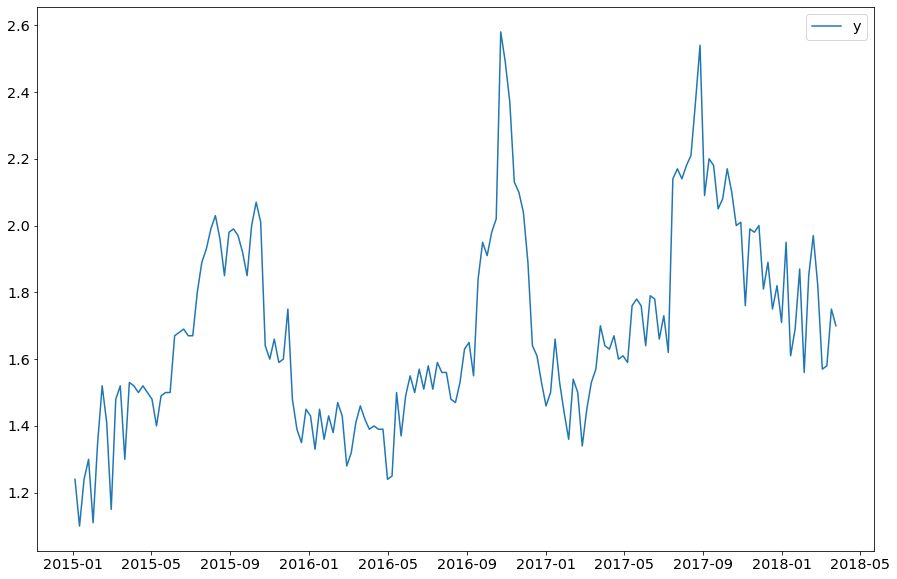

In [19]:
sns.lineplot(data = df.set_index(keys = 'ds')).set_xlabel('');

Dữ liệu kéo dài từ đầu năm 2015 đến giữa năm 2018.
Nhìn trên ta có thể thấy xu hướng dữ liệu biến động rất lớn. Vẫn chưa nhìn rõ được trend sẽ như thế nào. Nhìn nhìn chung có xu hướng tăng qua mỗi năm.

In [26]:
df_index = df.set_index(keys = 'ds').sort_index()
df_index.head()

,y
ds,
2015-01-04,1.24
2015-01-11,1.10
2015-01-18,1.24
2015-01-25,1.30
2015-02-01,1.11


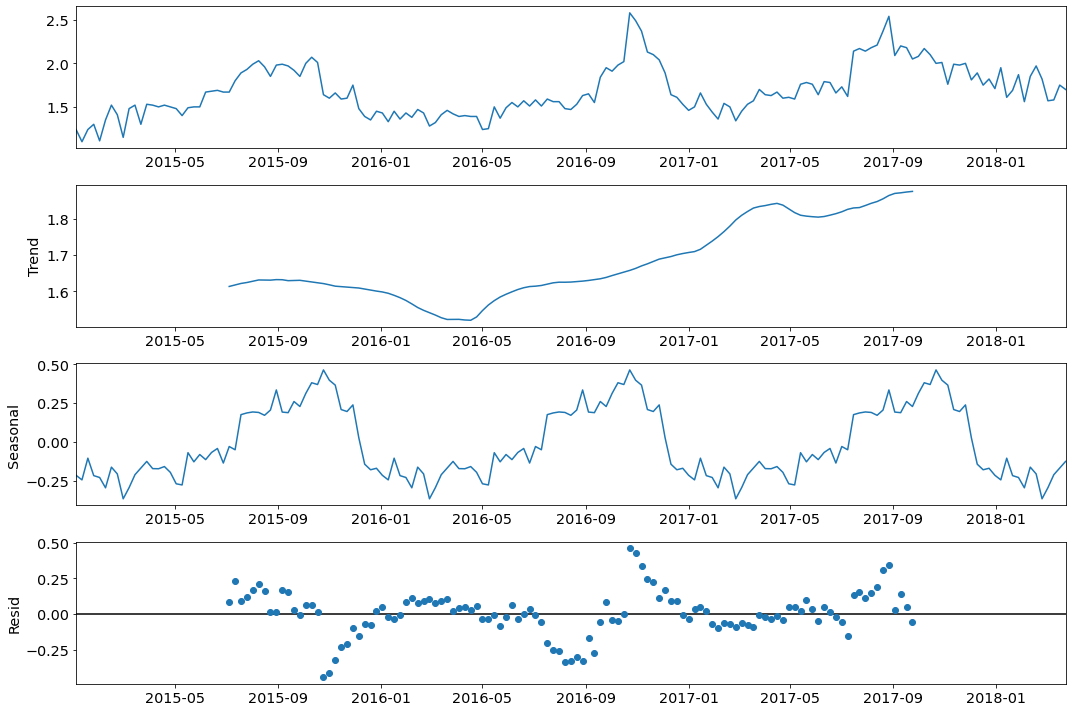

In [27]:
#Seasonal decompose analysys
seasonal_decompose(df_index , model = 'add').plot();

Từ biểu đồ Trend, chúng ta đã xác định rõ là dữ liệu sẽ tăng qua mỗi năm, có biến động lớn ở giữa năm 2016 đến đầu 2017. Sau đó tăng mạnh đến cuối năm 2017.
Ngoài ra giá tăng có xu hướng tăng theo mùa qua mỗi năm, biến động một cách đều đặng.

# Xây dựng model

In [35]:
import math
def time_series_split(df, train_size):
    total_rows = df.shape[0]

    ac_train_size = math.ceil(total_rows*train_size)

    train = df.iloc[:ac_train_size]
    test = df.iloc[ac_train_size:]

    return train, test

In [38]:
train_index, test_index = time_series_split(df_index, 0.8)
train, test = time_series_split(df, 0.8)
test_index.head()

,y
ds,
2017-08-13,2.21
2017-08-20,2.37
2017-08-27,2.54
2017-09-03,2.09
2017-09-10,2.20


In [39]:
test_index.tail()

,y
ds,
2018-02-25,1.82
2018-03-04,1.57
2018-03-11,1.58
2018-03-18,1.75
2018-03-25,1.70


## SARIMA

In [40]:
sarima_model = auto_arima(train_index, start_p=2, start_q=2,
                          max_p=5, max_q=5, m=12,
                          start_P=1, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          n_jobs= 4,
                          stepwise=True)

C:\Users\PC\anaconda3\envs\dstn\lib\site-packages\pmdarima\arima\_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-81.558, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-105.445, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-79.603, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-104.842, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-107.392, Time=0.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-106.741, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-105.465, Time=0.0

In [51]:
#Fit model
sarima_model.fit(train_index)
#Predict
test_forecast = sarima_model.predict(n_periods=len(test_index))
test_forecast = pd.DataFrame(test_forecast, index = test_index.index, columns = ['Prediction'])
test_forecast.tail()

,Prediction
ds,
2018-02-25,2.987592
2018-03-04,2.889933
2018-03-11,2.930145
2018-03-18,2.875997
2018-03-25,3.176309


In [44]:
#Save scoring
scoring = pd.DataFrame()
scoring.loc[0,'Aglothirm'] = 'SARIMA'
scoring.loc[0,'MSE on Test'] = mean_squared_error(test_index, test_forecast)
scoring

,Aglothirm,MSE on Test
0,SARIMA,0.674149


## HoltWinter

In [50]:
#Init and fit model
hwmodel = ExponentialSmoothing(train_index, seasonal='add').fit()
test_forecast = hwmodel.forecast(len(test))
#Forecast
test_forecast = pd.DataFrame(test_forecast, index = test_index.index, columns = ['Prediction'])
test_forecast.tail()

C:\Users\PC\anaconda3\envs\dstn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


,Prediction
ds,
2018-02-25,1.609155
2018-03-04,1.765727
2018-03-11,1.832253
2018-03-18,1.785554
2018-03-25,1.888813


In [47]:
#Save scoring
scoring.loc[1,'Aglothirm'] = 'HoltWinter'
scoring.loc[1,'MSE on Test'] = mean_absolute_error(test_index, test_forecast)
scoring

,Aglothirm,MSE on Test
0,SARIMA,0.674149
1,HoltWinter,0.192824


## Fbprophet

In [107]:
CAP = 3.5
train['cap'] = CAP
test['cap']= CAP

C:\Users\PC\anaconda3\envs\dstn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\anaconda3\envs\dstn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
#Init model
m = Prophet(growth='logistic') #Turn on logistic because we saw the trend up above, it growth logistic
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
#Create future stream
future = m.make_future_dataframe(periods=12, freq='W')
future['cap']= CAP
future.tail()

,ds,cap
143,2018-02-25,3.5
144,2018-03-04,3.5
145,2018-03-11,3.5
146,2018-03-18,3.5
147,2018-03-25,3.5


In [110]:
#Forecast the unknown
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
143,2018-02-25,1.590979,1.375925,1.818464
144,2018-03-04,1.573617,1.359592,1.804584
145,2018-03-11,1.599888,1.384507,1.825162
146,2018-03-18,1.650925,1.427720,1.878786
147,2018-03-25,1.689935,1.464237,1.894743


In [111]:
test_index.index[0]

Timestamp('2017-08-13 00:00:00')

In [112]:
#Make a predict
predict = forecast[forecast['ds'] >= test_index.index[0]]
predict= predict[['ds', 'yhat']]
predict

,ds,yhat
115,2017-08-13,1.997514
116,2017-08-20,2.016717
117,2017-08-27,2.044736
118,2017-09-03,2.056371
119,2017-09-10,2.041439
120,2017-09-17,2.021056
121,2017-09-24,2.030403
122,2017-10-01,2.082380
123,2017-10-08,2.148980
124,2017-10-15,2.182637


In [113]:
#Save scoring
scoring.loc[2,'Aglothirm'] = 'Fbprophet'
scoring.loc[2,'MSE on Test'] = mean_absolute_error(test['y'], predict['yhat'])
scoring

,Aglothirm,MSE on Test
0,SARIMA,0.674149
1,HoltWinter,0.192824
2,Fbprophet,0.322677


In [130]:
test['y'].std()

0.15452517692282478

Vậy là HoltWinter hoạt động tốt hơn hai thuật toán còn lại. Sai số là 0.19 rất gần với dao động của dữ liệu thực tế là 0.15

# Báo cáo kết quả

In [118]:
#Holtwinter model from up above
test_forecast = hwmodel.forecast(len(test_index))
#Forecast
test_forecast = pd.DataFrame(test_forecast, index = test_index.index, columns = ['Prediction'])

In [114]:
365/7

52.142857142857146

In [116]:
#Init best_model
best_model = ExponentialSmoothing(df_index, seasonal='add').fit()
next_year = best_model.forecast(52)
next_year.tail()

C:\Users\PC\anaconda3\envs\dstn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


2019-02-24    1.544512
2019-03-03    1.599992
2019-03-10    1.653048
2019-03-17    1.661035
2019-03-24    1.726458
Freq: W-SUN, dtype: float64

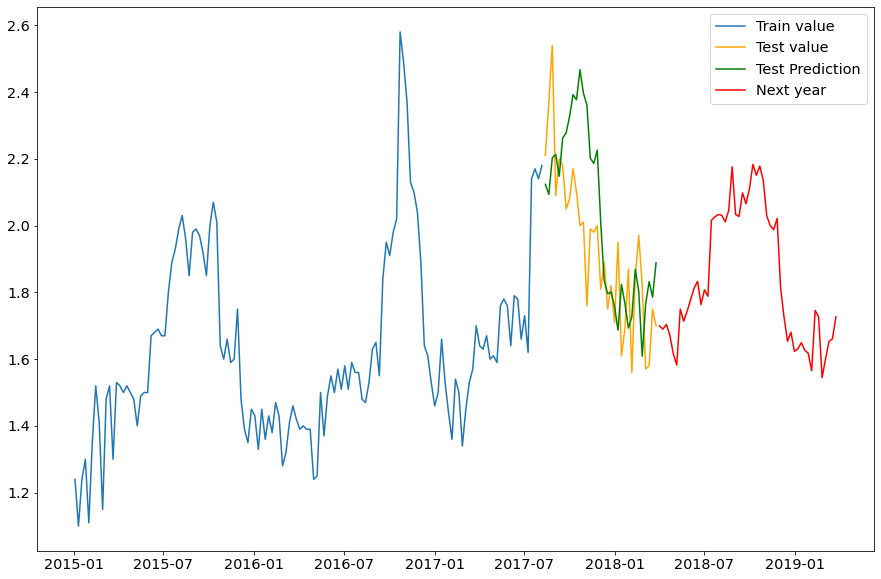

In [119]:
#Ploting
graph = plt.plot(train_index, label = 'Train value')
graph = plt.plot(test_index, label = 'Test value', color = 'orange')
graph = plt.plot(test_forecast, label = 'Test Prediction', color = 'green')
graph = plt.plot(next_year, label = 'Next year', color = 'red')
plt.legend()
plt.show()

Giá bơ hữa cơ tại California trong năm tới sẽ không có nhiều biến động theo mô hình dự đoán của HoltWinter. Tuy nhiên dựa trên dữ kiện trên năm ngoái là 2018 và giữa 2017 thì, giá bơ có thể tăng bất bình thường một lần nữa. Vậy nên chúng ta thử kiểm chứng lại bằng mô hình của fb

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


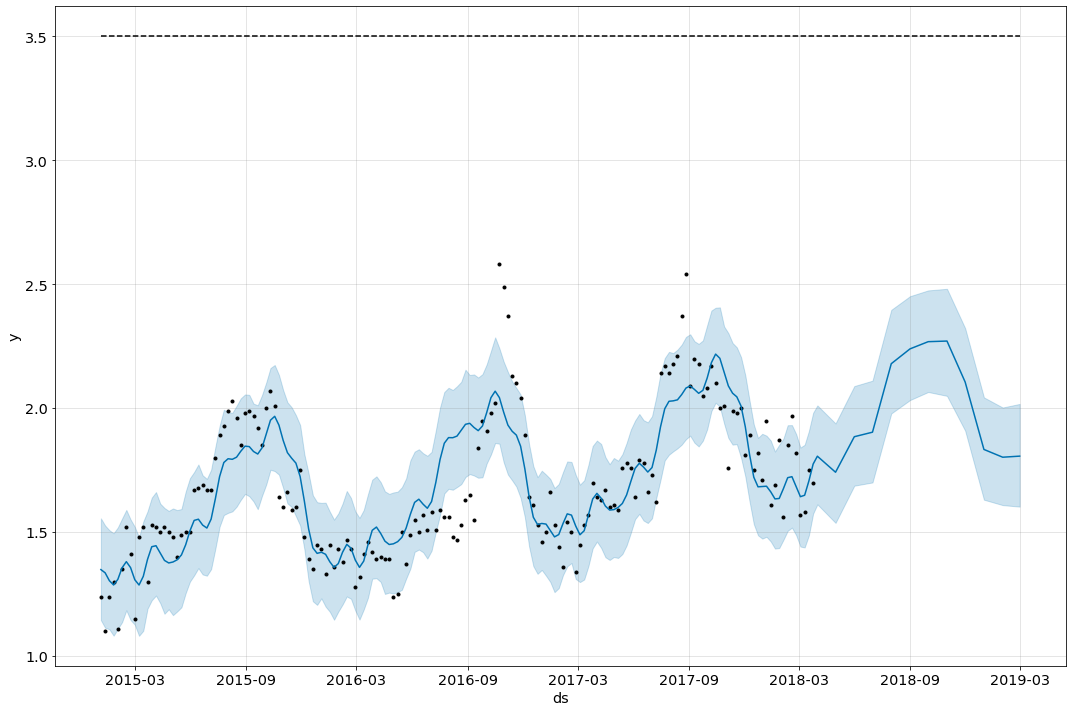

In [127]:
#Init model
df['cap'] = CAP
m = Prophet(growth='logistic') #Turn on logistic because we saw the trend up above, it growth logistic
m.fit(df)
#Create future stream
future = m.make_future_dataframe(periods=12, freq='MS', include_history=True)
future['cap']= CAP
#Forecast the unknown
forecast = m.predict(future)
#Take a look at the graph
m.plot(forecast, figsize=(15,10));

Mô hình của fbprophet cũng cho ra kết quả khá tương đồng với Gió Mùa Đông, tuy nhiên nhìn chung sang năm ngoái giá bơ dự đoán có xu hướng tăng.

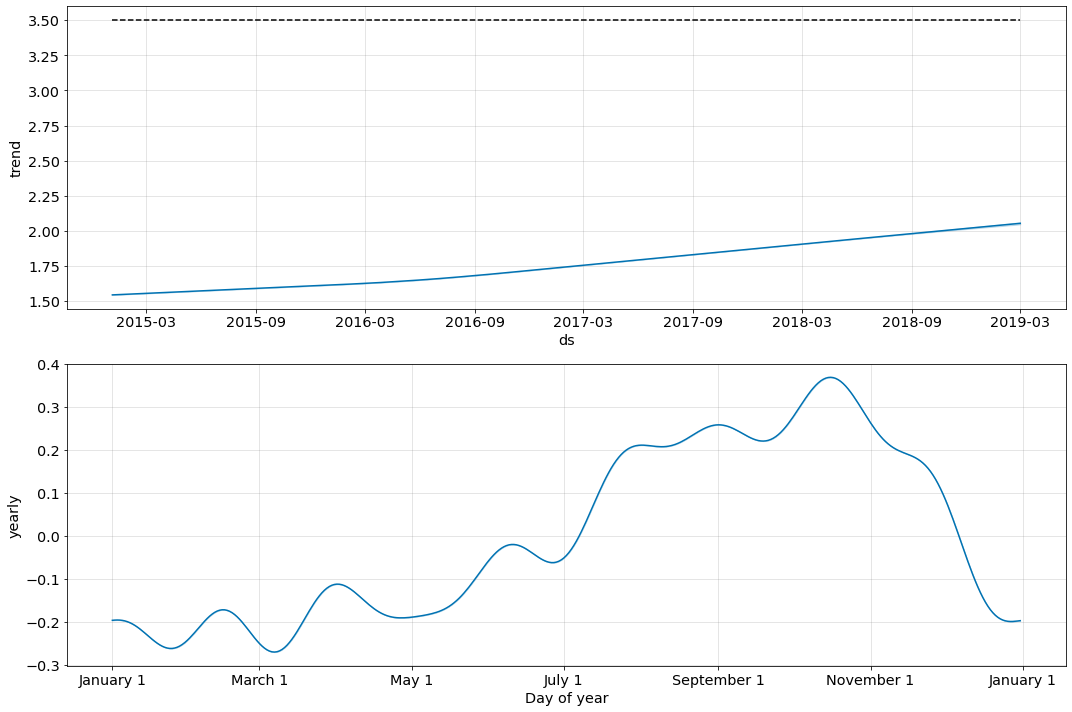

In [129]:
m.plot_components(forecast, figsize=(15,10));

Như chúng ta đã nói trong part một, giá bơ có xu hướng tăng mạnh vào đầu mùa thu. Giảm mạnh vào cuối mùa đông.

## Tổng hợp

- Trong cả hai model tốt nhất đều cho ra kết quả là trong năm sau, giá bơ hữa cơ tại California sẽ gia tăng. Chúng ta có thể cân nhắc mở rộng tại bang này. Tuy nhiên biến động giá cả chưa chắc tượng chưng cho doanh thu của doanh nghiệp, vậy nên nếu có dữ liệu doanh thu tại các cửa hàng chúng ta sẽ cân nhắc cho ra một quyết định chính xác hơn.

- Ngoài ra, giá cả của bơ cũng biến động theo mùa, tăng mạnh vào mùa thu và giảm mạnh vào cuối mùa đông.

- Một điều đáng lưu ý nữa là, giá cả của bơ tại năm 2017, 2016 có biến động mạnh, theo chiều hướng tăng. Vậy nên câu hỏi tiếp theo của chúng ta là tại sao nó lại biến động vào thời gian này? Yếu tố nào khiến nó biến động như vậy? Là một câu hỏi quan trọng để phát hiện những yếu tố tiềm năng để cải thiện cho doanh nghiệp sau này.